In [2]:
import pandas as pd 
import numpy as np

In [3]:
data=pd.DataFrame({'age':[29,34,13,27,10,68,15,53,51,48,63,43,8,47],
                  'gender':['m','m','f','f','f','m','m','m','m','f','f','m','f','f'],
                  'bought':['y','y','y','n','n','y','y','y','n','n','n','y','n','n']})
data

,age,gender,bought
0,29,m,y
1,34,m,y
2,13,f,y
3,27,f,n
4,10,f,n
5,68,m,y
6,15,m,y
7,53,m,y
8,51,m,n
9,48,f,n


In [4]:
data.gender = data.gender.map({'m':0,'f':1})
data.bought = data.bought.map({'y':1,'n':0})
data

,age,gender,bought
0,29,0,1
1,34,0,1
2,13,1,1
3,27,1,0
4,10,1,0
5,68,0,1
6,15,0,1
7,53,0,1
8,51,0,0
9,48,1,0


In [28]:
data.corr()

,age,gender,bought
age,1.000000,-0.286952,0.003727
gender,-0.286952,1.000000,-0.714286
bought,0.003727,-0.714286,1.000000


#### bought depends upon gender mostly and not age, but still we will go ahead with both for demo

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [46]:
iv=data[['age','gender']]
#iv=data[['gender']]
dv=data['bought']
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=42)

In [47]:
model = DecisionTreeClassifier().fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.6666666666666666

In [48]:
model.score(iv_train,dv_train)

1.0

#### we had score as 1 on train, but on test it is so poor. Because decision trees are prone to overfitting on data and due that the unseen(test data), performance suffers a lot

In [49]:
model = DecisionTreeClassifier(min_samples_leaf=6).fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.3333333333333333

#### Use parameteres in DT for pruning
- min_samples_leaf - If there are less than 5% of orginal data, then dont split it further
Since each leaf node (path) gives rules, but if that rule is derived based on a few records(they dont represent our sample), so they will not be significant, so prune that branch
- max_depth
- max_leaf_nodes : restricts the tree size and avoids overfitting

In [50]:
model = DecisionTreeClassifier(min_samples_leaf=5).fit(iv_train,dv_train)
model.score(iv_test,dv_test)

1.0

#### see the drastic improvement, when we restricted the samples in leaf(further which we prune. or else it will try to fit few observations, which occur lesser in frequeny, and overfit each data point
- 14*0.5 = 7, try variations aroud that and see

In [51]:
model = DecisionTreeClassifier().fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)


## precision and recall from confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

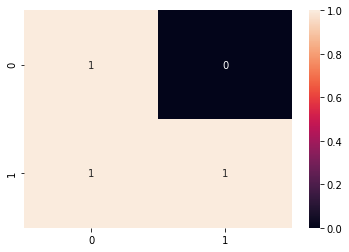

In [53]:
cm = confusion_matrix(dv_test,dv_test_pred)
sb.heatmap(cm,annot=True)

In [54]:
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
fpr = cm[0,1]/(cm[0,0]+cm[0,1])
acc,recall,fpr


(0.6666666666666666, 0.5, 0.0)

## precision-recall curve

In [55]:
from sklearn.metrics import precision_recall_curve,f1_score,roc_curve,accuracy_score
dv_test_proba = model.predict_proba(iv_test)[::,1]
prec,recall,_= precision_recall_curve(dv_test,dv_test_proba)
f1_score(dv_test,dv_test_pred)

0.6666666666666666

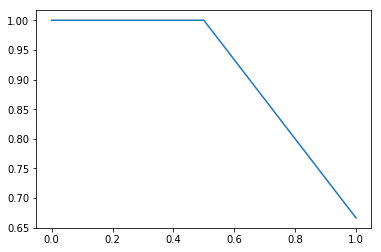

In [56]:
import matplotlib.pyplot as plt
plt.plot(recall,prec)

## ROC curve area

In [57]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(dv_test,dv_test_proba)
fpr,tpr

(array([0., 0., 1.]), array([0. , 0.5, 1. ]))

In [58]:
auc(fpr,tpr)

0.75

In [59]:
dv_test_proba = model.predict_proba(iv_test)[::,1]
accuracy_score(dv_test,dv_test_pred)

0.6666666666666666

## Logloss function is a way to penalize the errors, as to how many times your model predicted fare away from actual

In [60]:
from sklearn.metrics import log_loss

In [61]:
log_loss(dv_test,dv_test_proba),model.tree_.node_count

(11.512925464970229, 11)

## DecisionTreeClassifier

In [62]:
from sklearn.datasets import make_classification
seed = 104
iv,dv = make_classification(n_samples=1000, n_features=20, n_informative=8, n_redundant=3, n_repeated=2, random_state=seed)

In [63]:
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=seed)

In [ ]:
model = DecisionTreeClassifier().fit(iv_train,dv_train)
model.score(iv_test,dv_test)

In [ ]:
cm = confusion_matrix(dv_test,dv_test_pred)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
fpr = cm[0,1]/(cm[0,0]+cm[0,1])
acc,recall,fpr


In [ ]:
dv_test_pred = model.predict(iv_test)
dv_test_proba=model.predict_proba(iv_test)[::,1]
accuracy_score(dv_test,dv_test_pred),log_loss(dv_test,dv_test_proba)

In [ ]:
dv_test[:10],dv_test_pred[:10],dv_test_proba[:10]

#### wee see only last one is wrongly classified

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(random_state=seed).fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
dv_test_proba=model.predict_proba(iv_test)[::,1]
accuracy_score(dv_test,dv_test_pred),log_loss(dv_test,dv_test_proba)

#### model score/accuracy score increased and even the logloss value is very less
- accuracy is calculated from confusion matrix(TP and TN / overall) in classification and for regression we have 1-(ssres/sstotal) to be used

## XGBClassifier

In [23]:
#pip install xgboost

In [24]:
from xgboost import XGBClassifier

In [64]:
iv,dv = make_classification(n_samples=1000, n_features=20, n_informative=8, n_redundant=3, n_repeated=2, random_state=seed)
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=seed)
model = XGBClassifier(random_state=seed).fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
dv_test_proba=model.predict_proba(iv_test)[::,1]
accuracy_score(dv_test,dv_test_pred),log_loss(dv_test,dv_test_proba)

(0.915, 0.22844620122166817)